In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dfx=pd.read_csv(r"C:\Users\Hosiyar Singh\Documents\python machine learning\KNN algorithm\KNN_assignment\Diabetes_XTrain.csv")
print(dfx.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [4]:
dfy=pd.read_csv(r"C:\Users\Hosiyar Singh\Documents\python machine learning\KNN algorithm\KNN_assignment\Diabetes_YTrain.csv")

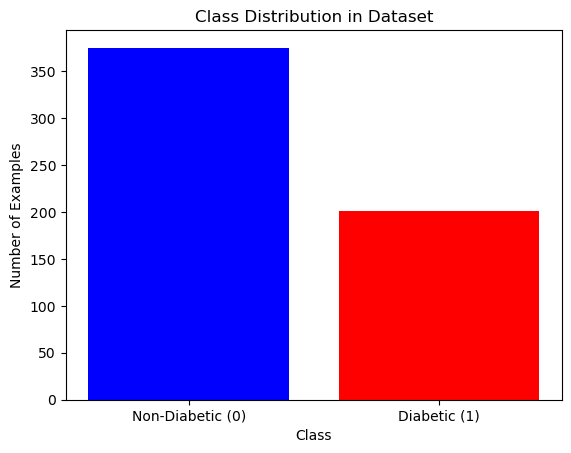

In [5]:
plt.bar(['Non-Diabetic (0)', 'Diabetic (1)'], dfy.value_counts(), color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Number of Examples')
plt.title('Class Distribution in Dataset')
plt.show()

In [9]:
x=dfx.values
y = dfy.values
y = y[:,0:].reshape((-1,)) 

In [13]:
# Data normalization (Min-Max Scaling without sklearn)
def min_max_scaling(data):
    return (data - data.min()) / (data.max() - data.min())


In [14]:
x = np.apply_along_axis(min_max_scaling, 0, x)

In [15]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))


def knn(x, y, querypoint, k=5):
    vals = []
    for i in range(x.shape[0]):
        d = distance(querypoint, x[i])
        vals.append((d, y[i]))
    vals = sorted(vals)[:k]  # Sort and take top k
    labels = [label for _, label in vals]
    new_values = np.unique(labels, return_counts=True)
    index = new_values[1].argmax()
    pred = new_values[0][index]
    return pred

In [12]:
df_x_test=pd.read_csv(r"C:\Users\Hosiyar Singh\Documents\python machine learning\KNN algorithm\KNN_assignment\Diabetes_Xtest.csv")

In [16]:
x_test = df_x_test.values
x_test = np.apply_along_axis(min_max_scaling, 0, x_test)

In [24]:
predictions = [knn(x, y, query, k=5) for query in x_test]

In [25]:
print(predictions)

[1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0]


In [27]:
pd.DataFrame(predictions, columns=["Outcome"]).to_csv(r"C:\Users\Hosiyar Singh\Documents\python machine learning\KNN algorithm\KNN_assignment\diabetes_predictions.csv", index=False)

In [28]:
print('predictions saved')

predictions saved
